# 四.图像平滑之均值滤波、方框滤波、高斯滤波及中值滤波

讲解Python调用OpenCV实现图像平滑，包括五个部分：

1.图像平滑

2.均值滤波

3.方框滤波

4.高斯滤波

5.中值滤波。

## 4.1 图像平滑

1.图像增强

图像增强是对图像进行处理，使其比原始图像更适合于特定的应用，它需要与实际应用相结合。对于图像的某些特征如边缘、轮廓、对比度等，图像增强是进行强调或锐化，以便于显示、观察或进一步分析与处理。图像增强的方法是因应用不同而不同的，研究内容包括：


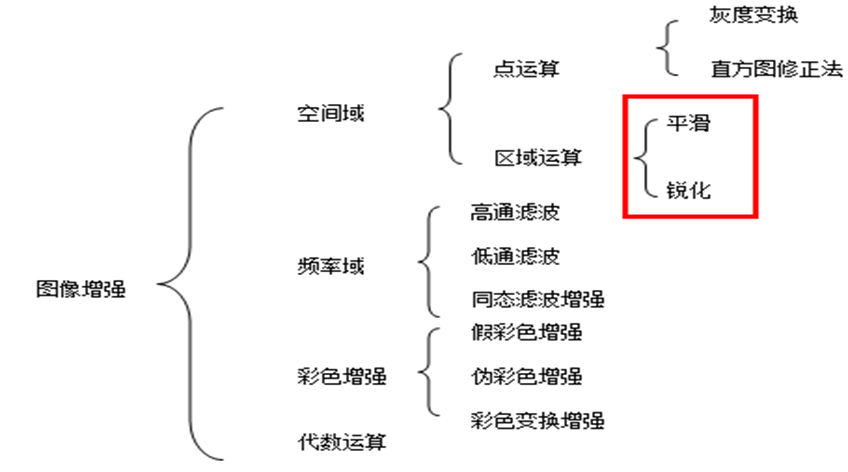

2.图像平滑

图像平滑是一种区域增强的算法，平滑算法有邻域平均法、中指滤波、边界保持类滤波等。在图像产生、传输和复制过程中，常常会因为多方面原因而被噪声干扰或出现数据丢失，降低了图像的质量（某一像素，如果它与周围像素点相比有明显的不同，则该点被噪声所感染）。这就需要对图像进行一定的增强处理以减小这些缺陷带来的影响。


3.邻域平均法

图像简单平滑是指通过邻域简单平均对图像进行平滑处理的方法，用这种方法在一定程度上消除原始图像中的噪声、降低原始图像对比度的作用。它利用卷积运算对图像邻域的像素灰度进行平均，从而达到减小图像中噪声影响、降低图像对比度的目的。但邻域平均值主要缺点是在降低噪声的同时使图像变得模糊，特别在边缘和细节处，而且邻域越大，在去噪能力增强的同时模糊程度越严重。


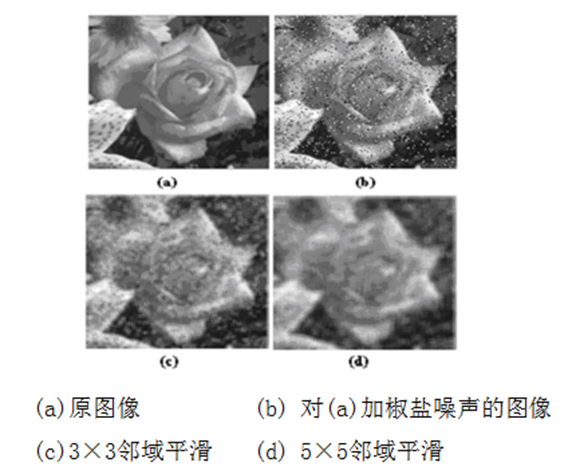

首先给出为图像增加噪声的代码

In [3]:
import cv2
import numpy as np

#读取图片
img = cv2.imread("test.jpg", cv2.IMREAD_UNCHANGED)
rows, cols, chn = img.shape

#加噪声
for i in range(5000):    
    x = np.random.randint(0, rows) 
    y = np.random.randint(0, cols)    
    img[x,y,:] = 255

cv2.imshow("noise", img)
           
#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


## 4.2 均值滤波

1.原理

均值滤波是指任意一点的像素值，都是周围N*M个像素值的均值。例如下图中，红色点的像素值为蓝色背景区域像素值之和除均值滤波是指任意一点的像素值，都是周围N*M个像素值的均值。例如下图中，红色点的像素值为蓝色背景像素值之和除25


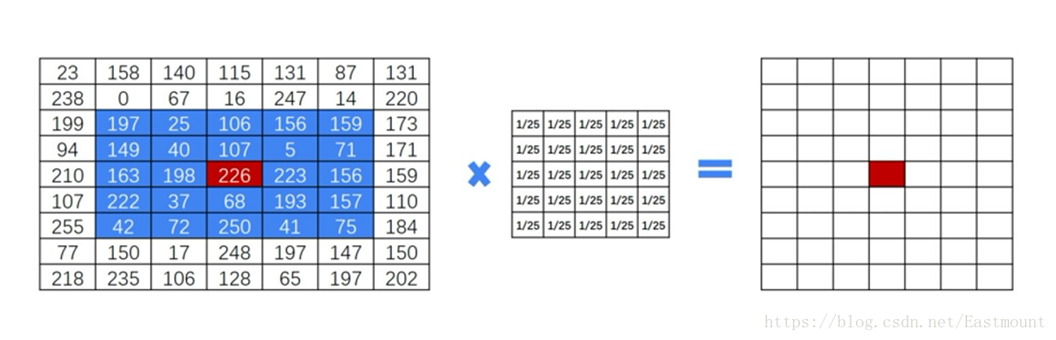

其中红色区域的像素值均值滤波处理过程为：

((197+25+106+156+159)+(149+40+107+5+71)+(163+198+226+223+156)+(222+37+68+193+157)+(42+72+250+41+75)) / 25

其中5*5的矩阵称为核，针对原始图像内的像素点，
采用核进行处理，得到结果图像


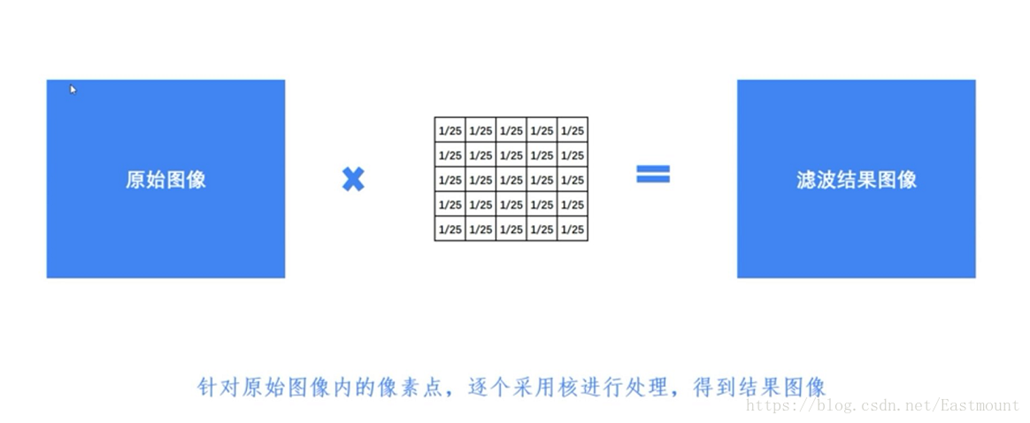


提取1/25可以将核转换为如下形式


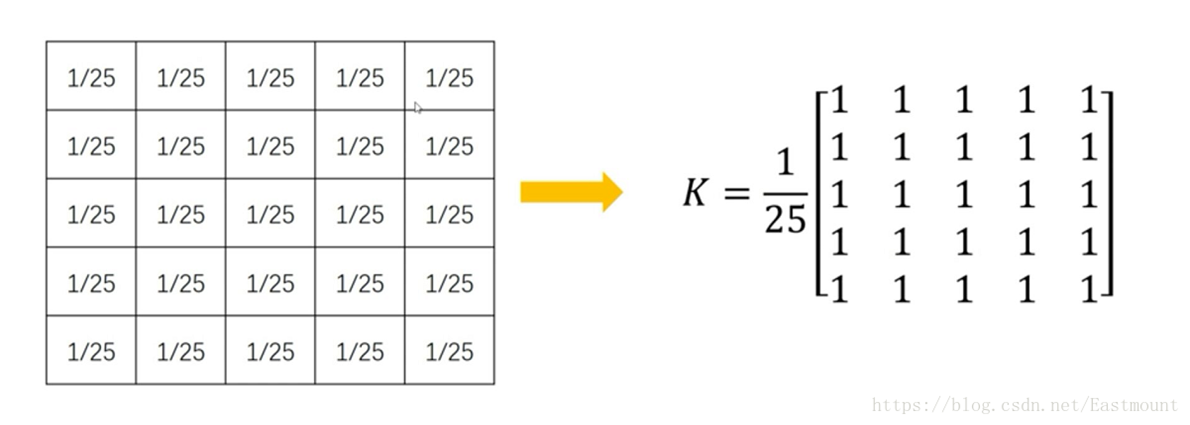

2.代码实现

Python调用OpenCV实现均值滤波的核心函数如下：

result = cv2.blur(原始图像,核大小)

其中，核大小是以（宽度，高度）表示的元祖形式。
常见的形式包括：核大小（3，3）和（5，5）。


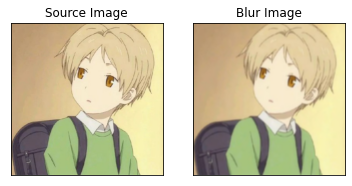

In [2]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
source = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#均值滤波
result = cv2.blur(source, (5,5))
 
#显示图形
titles = ['Source Image', 'Blur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  


## 4.3 方框滤波

方框滤波和均值滤波核基本一致，区别是需不需要均一化处理。OpenCV调用boxFilter()函数实现方框滤波。
函数如下：result = cv2.boxFilter(原始图像, 目标图像深度, 核大小, normalize属性)其中，目标图像深度是int类型，通常用“-1”表示与原始图像一直；核大小主要包括（3，3）和（5，5）

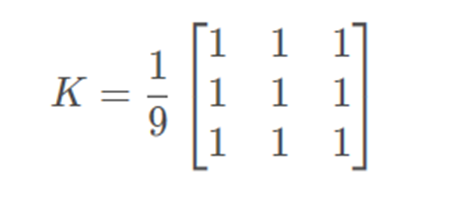



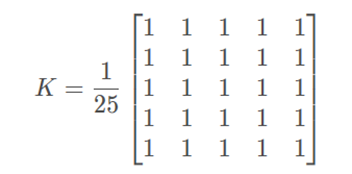

normalize属性表示是否对目标图像进行归一化处理。

当normalize为true时需要执行均值化处理，
当normalize为false时，不进行均值化处理，实际上为求周围各像素的和，
很容易发生溢出，溢出时均为白色，对应像素值为255。


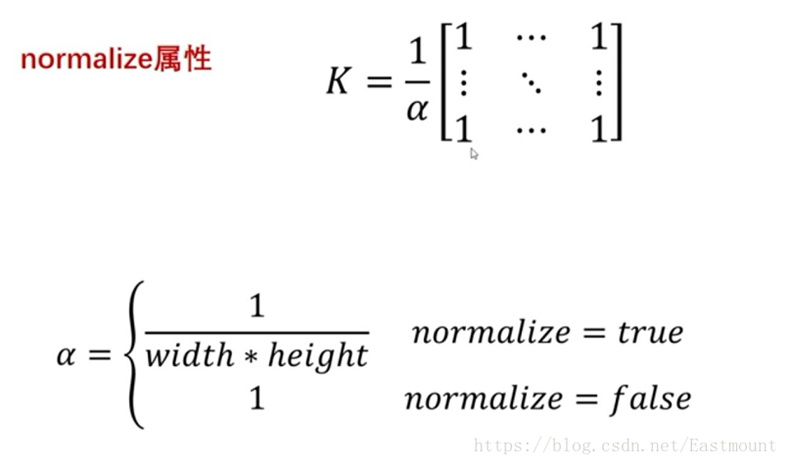

在图像简单平滑中，算法利用卷积模板逐一处理图像中每个像素，这一过程可以形象地比作对原始图像的像素一一进行过滤整理，在图像处理中把邻域像素逐一处理的算法过程称为滤波器。平滑线性滤波器的工作原理是利用模板对邻域内像素灰度进行加权平均，也称为均值滤波器。


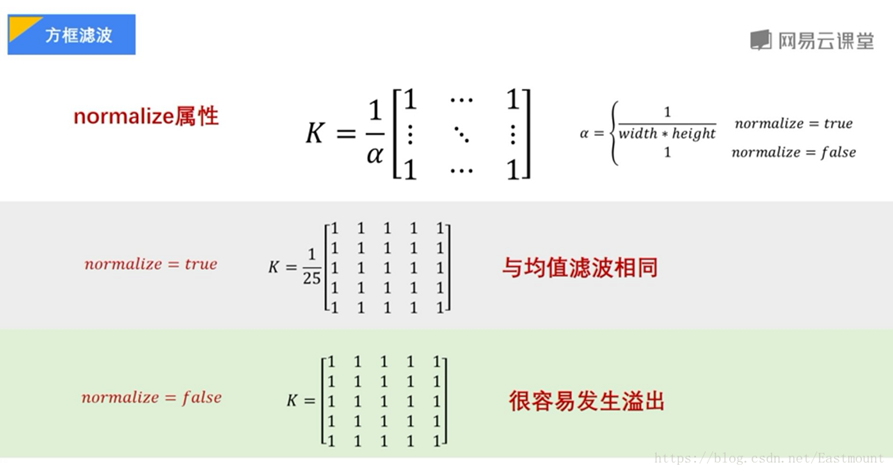

代码实现如下


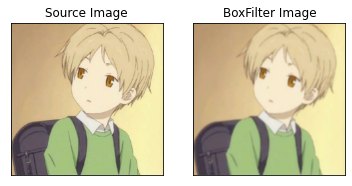

In [4]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
source = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#方框滤波
result = cv2.boxFilter(source, -1, (5,5), normalize=1)
 
#显示图形
titles = ['Source Image', 'BoxFilter Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  


下面是图像左上角处理前后的像素结果：


In [8]:
print(source[0:3, 0:3, 0])
# [[180 182 185]
#  [174 176 178]
#  [172 173 176]]
print(result[0:3, 0:3, 0])
# [[177 177 177]
#  [177 177 178]
#  [177 177 177]]


[[180 182 185]
 [174 176 178]
 [172 173 176]]
[[177 177 177]
 [177 177 178]
 [177 177 177]]


如果省略参数normalize，
则默认是进行归一化处理。
如果normalize=0
则不进行归一化处理，
像素值为周围像素之和，
图像更多为白色。


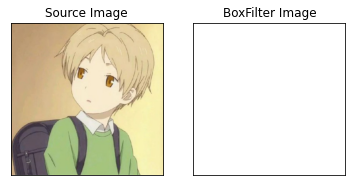

In [5]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
source = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#方框滤波
result = cv2.boxFilter(source, -1, (5,5), normalize=0)
 
#显示图形
titles = ['Source Image', 'BoxFilter Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show() 


上图很多像素为白色，因为图像求和结果几乎都是255。如果设置的是2*2矩阵，只取四个像素结果要好些。result = cv2.boxFilter(source, -1, (2,2), normalize=0)


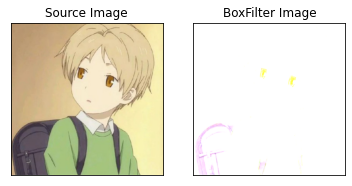

In [6]:
result = cv2.boxFilter(source, -1, (2,2), normalize=0)
#显示图形
titles = ['Source Image', 'BoxFilter Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show() 




## 4.4 高斯滤波

为了克服简单局部平均法的弊端(图像模糊)，目前已提出许多保持边缘、细节的局部平滑算法。它们的出发点都集中在如何选择邻域的大小、形状和方向、参数加平均及邻域各店的权重系数等。图像高斯平滑也是邻域平均的思想对图像进行平滑的一种方法，在图像高斯平滑中，对图像进行平均时，不同位置的像素被赋予了不同的权重。高斯平滑与简单平滑不同，它在对邻域内像素进行平均时，给予不同位置的像素不同的权值，下图的所示的 3 * 3 和 5 * 5 领域的高斯模板。


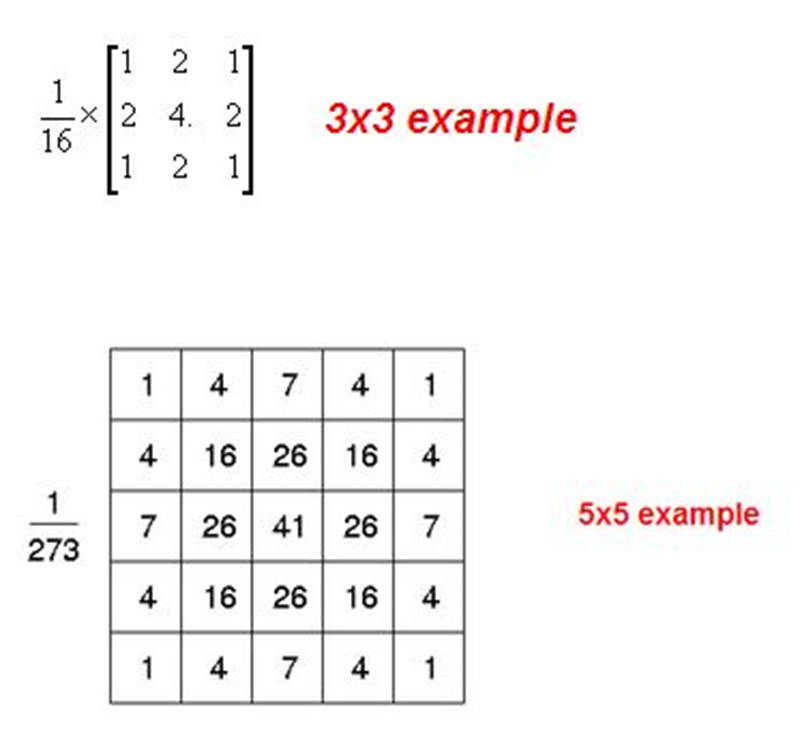

高斯滤波让临近的像素具有更高的重要度，对周围像素计算加权平均值，较近的像素具有较大的权重值。如下图所示，中心位置权重最高为0.4。


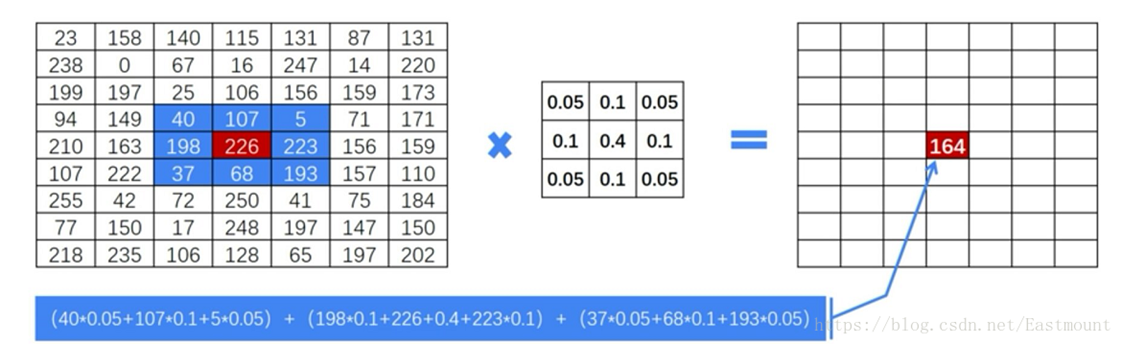

Python中OpenCV主要调用GaussianBlur函数，如下：dst = cv2.GaussianBlur(src, ksize, sigmaX)其中，src表示原始图像，ksize表示核大小，sigmaX表示X方向方差。注意，核大小（N, N）必须是奇数，X方向方差主要控制权重


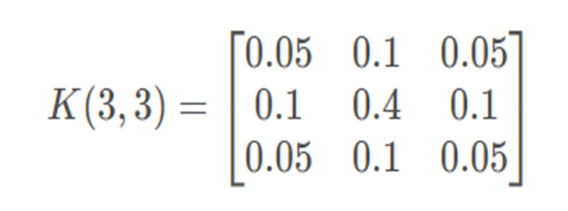

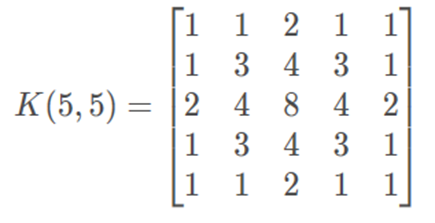

代码如下图示：


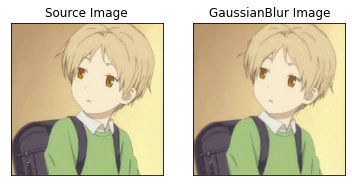

True

In [7]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
source = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#高斯滤波
result = cv2.GaussianBlur(source, (3,3), 0)

#显示图形
titles = ['Source Image', 'GaussianBlur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  
shuchu = cv2.cvtColor(result,cv2.COLOR_RGB2BGR)
cv2.imwrite("wq.jpg", shuchu)


如果使用15*15的核，则图形将更加模糊


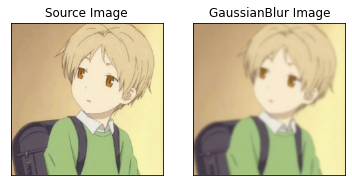

In [8]:
#高斯滤波
result = cv2.GaussianBlur(source, (15,15), 0)

#显示图形
titles = ['Source Image', 'GaussianBlur Image']  
images = [source, result]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  

## 4.5中值滤波

1.概念

在使用邻域平均法去噪的同时也使得边界变得模糊。而中值滤波是非线性的图像处理方法，在去噪的同时可以兼顾到边界信息的保留。选一个含有奇数点的窗口W，将这个窗口在图像上扫描，把窗口中所含的像素点按灰度级的升或降序排列，取位于中间的灰度值来代替该点的灰度值。 例如选择滤波的窗口如下图，是一个一维的窗口，待处理像素的灰度取这个模板中灰度的中值，滤波过程如下：


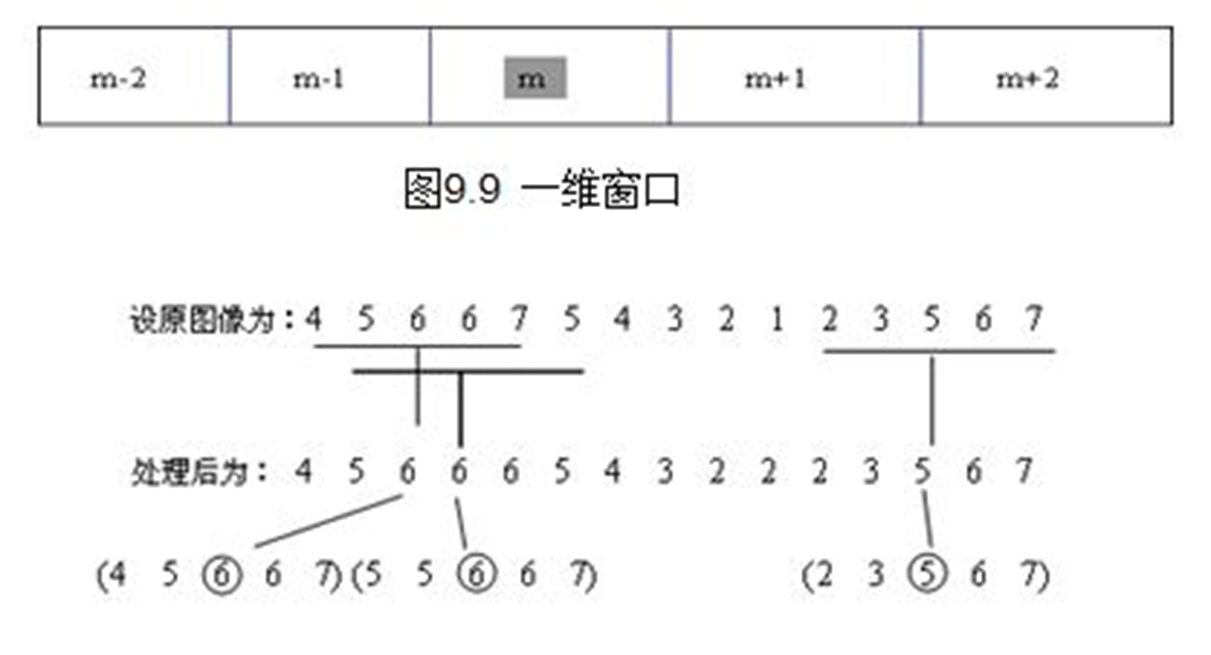

如下图所示，将临近像素按照大小排列，取排序像素中位于中间位置的值作为中值滤波的像素值。


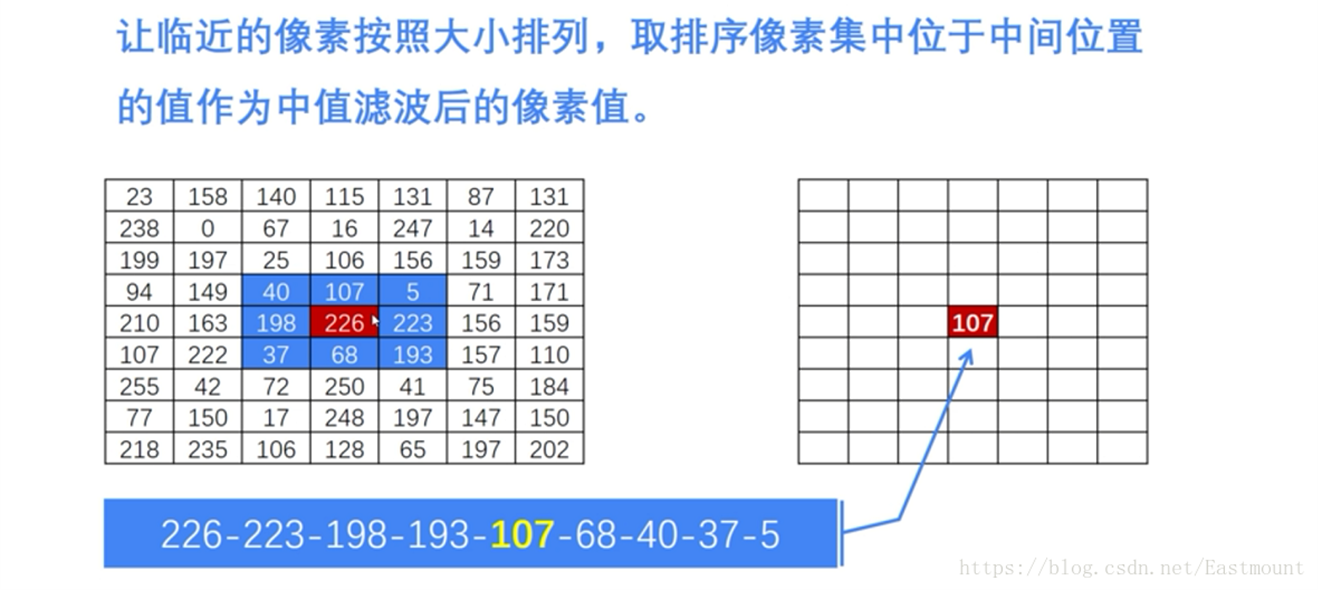

代码实现                         

In [9]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
 
#高斯滤波
result = cv2.medianBlur(img, 3)

#显示图像
cv2.imshow("source img", img)
cv2.imshow("medianBlur", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


常用的窗口还有方形、十字形、圆形和环形。
不同形状的窗口产生不同的滤波效果，方形和圆形窗口适合外轮廓线较长的物体图像，而十字形窗口对有尖顶角状的图像效果好。
中值滤波对于消除孤立点和线段的干扰十分有用，尤其是对于二进噪声，但对消除高斯噪声的影响效果不佳。
对于一些细节较多的复杂图像，可以多次使用不同的中值滤波。


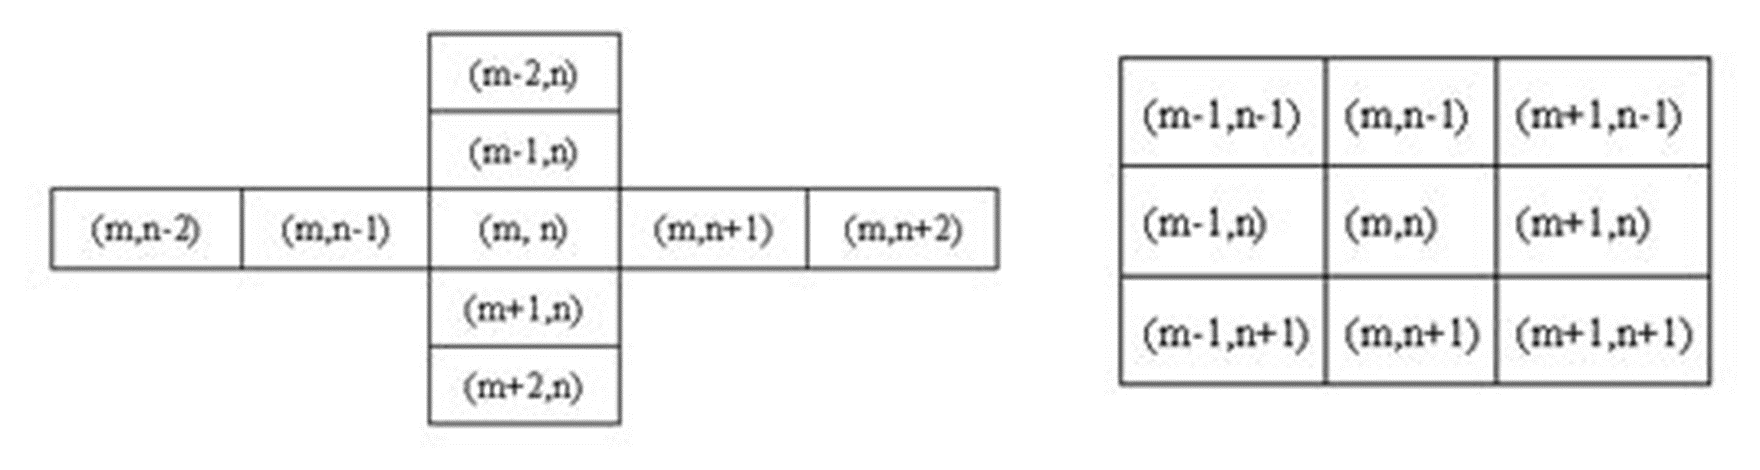